In [157]:
# Import relevant packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from scipy.stats import shapiro


## Load and Inspect Data

In [150]:
# Load dataset and return shape of data and the first five rows
df = pd.read_csv('./data/dataset-uci.csv')
df.index.name = "Index"
print("shape:", df.shape)
df.head()

shape: (319, 39)


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
Index,,,,,,,,,,,,,,,,,,,,,
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [123]:
# Check column names and data types. Also check non-null count per column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [124]:
# Count total missing values in the entire DataFrame
total_missing = df.isnull().sum().sum()
print("Total missing values in dataset:", total_missing)


Total missing values in dataset: 0


In [125]:
# Quick summary of the data
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


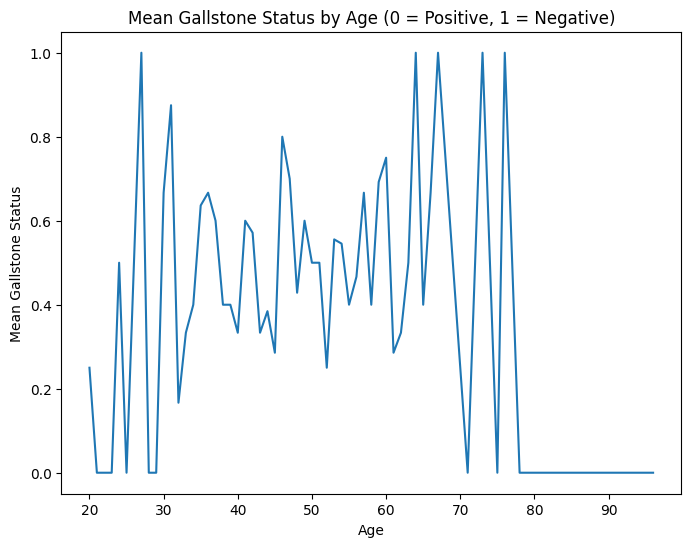

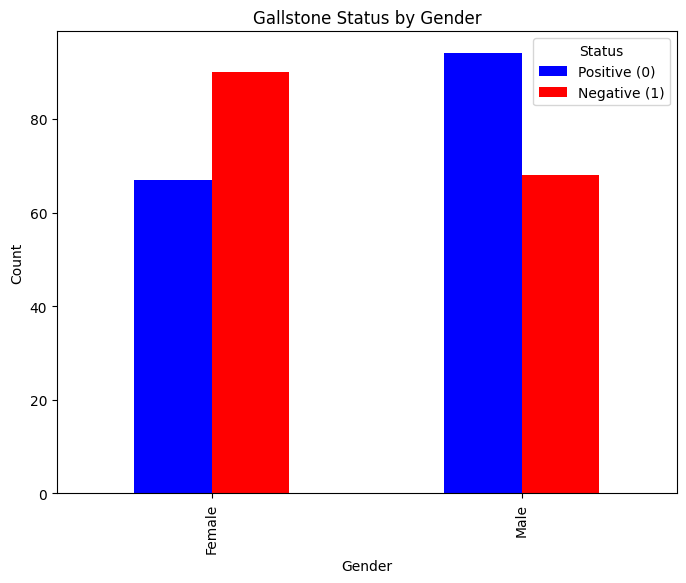

In [126]:
# Visualize gallstone status across age and gender
dfchart = df

# Line Chart: Gallstone Status by Age
mean_status_by_age = dfchart.groupby("Age")["Gallstone Status"].mean()

plt.figure(figsize=(8, 6))
plt.plot(mean_status_by_age.index, mean_status_by_age.values)
plt.xlabel("Age")
plt.ylabel("Mean Gallstone Status")
plt.title("Mean Gallstone Status by Age (0 = Positive, 1 = Negative)")
plt.show()

# Column Chart: Gallstone Status by Gender 
gender_map = {0: "Male", 1: "Female"}
gender_labels = dfchart["Gender"].map(gender_map)

gender_status_counts = dfchart.groupby(gender_labels)["Gallstone Status"].value_counts().unstack().fillna(0)
gender_status_counts.columns = ["Positive (0)", "Negative (1)"]

gender_status_counts.plot(kind="bar", figsize=(8, 6), color=["blue", "red"])
plt.title("Gallstone Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()


### Filter the dataset to remove outliers
The process begins by checking whether each column is approximately normally distributed.

- If a column is normal, we apply a Z-score method to identify outliers.
- If a column is not normal, we use an IQR-based (Interquartile Range) approach with adjusted quantile thresholds.

However, if only a few columns are normally distributed, we simplify the process by applying the IQR method to all columns, since IQR is a robust approach that works well for both normal and non-normal distributions.

In [127]:
# Create a copy of the original DataFrame to check for normal distribution
df_checknormaldistribution = df

# Identify binary columns (those that only contain 0 and 1 values)
binary_columns = [
    col for col in df_checknormaldistribution.columns
    if set(df_checknormaldistribution[col].dropna().unique()) <= {0, 1}
]

# Drop binary columns from the DataFrame, as they are not suitable for normality testing
df_checknormaldistribution = df_checknormaldistribution.drop(columns=binary_columns)

# Initialize lists to store names of normally and non-normally distributed columns
normal_columns = []
non_normal_columns = []

# Loop through each remaining column to test for normality using the Shapiro-Wilk test
for col in df_checknormaldistribution.columns:
    stat, p_value = shapiro(df[col])  # Perform Shapiro-Wilk test
    if p_value > 0.05:
        # If p-value > 0.05, data is normally distributed
        normal_columns.append(col)
    else:
        # If p-value <= 0.05, data is not normally distributed
        non_normal_columns.append(col)

print("Number of normal distributed columns:", len(normal_columns))
print("Number of non-normal distributed columns:", len(non_normal_columns))

Number of normal distributed columns: 3
Number of non-normal distributed columns: 30


Very few columns are normal distributed. Use IQR-approach for all columns for simplicity.

In [128]:
df_checkoutliers = df

# Drop columns that only have values 0 and 1
binary_columns = [col for col in df_checkoutliers.columns if set(df_checkoutliers[col].dropna().unique()) <= {0, 1}]
df_checkoutliers = df_checkoutliers.drop(columns=binary_columns)

# List to store column indexes
outlier_column_indexes = []  
nonoutliers = pd.Series(True, index=df.index)

for col_idx, col in enumerate(df_checkoutliers):
    Q1, Q3 = df_checkoutliers[col].quantile([0.05, 0.95])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Track non-outliers
    nonoutliers &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        outlier_column_indexes.append(col_idx)
        print(f"\nOutliers in column '{col}' (Index {col_idx}) "
              f"(Quantile range 0.05 to 0.95: {lower_bound:.2f} to {upper_bound:.2f}):")
        for idx, val in outliers[col].items():
            print(f"Row {idx}: Value = {val}")

print("\nColumns with outliers (indexes):", outlier_column_indexes)
print("Original shape:", df.shape)
filtereddf = df[nonoutliers]
print("Shape after removing outliers:", filtereddf.shape)


Outliers in column 'Comorbidity' (Index 1) (Quantile range 0.05 to 0.95: -1.50 to 2.50):
Row 14: Value = 3
Row 16: Value = 3

Outliers in column 'Intracellular Water (ICW)' (Index 7) (Quantile range 0.05 to 0.95: -7.05 to 55.46):
Row 178: Value = 57.1

Outliers in column 'Obesity (%)' (Index 15) (Quantile range 0.05 to 0.95: -100.30 to 175.48):
Row 239: Value = 1954.0

Outliers in column 'Glucose' (Index 20) (Quantile range 0.05 to 0.95: -39.75 to 292.65):
Row 20: Value = 374.0
Row 40: Value = 575.0
Row 310: Value = 325.0
Row 312: Value = 375.0

Outliers in column 'High Density Lipoprotein (HDL)' (Index 23) (Quantile range 0.05 to 0.95: -32.00 to 136.00):
Row 318: Value = 273.0

Outliers in column 'Triglyceride' (Index 24) (Quantile range 0.05 to 0.95: -349.85 to 716.15):
Row 242: Value = 838.0

Outliers in column 'Aspartat Aminotransferaz (AST)' (Index 25) (Quantile range 0.05 to 0.95: -31.15 to 81.25):
Row 44: Value = 149.0
Row 57: Value = 162.0
Row 278: Value = 195.0

Outliers in c

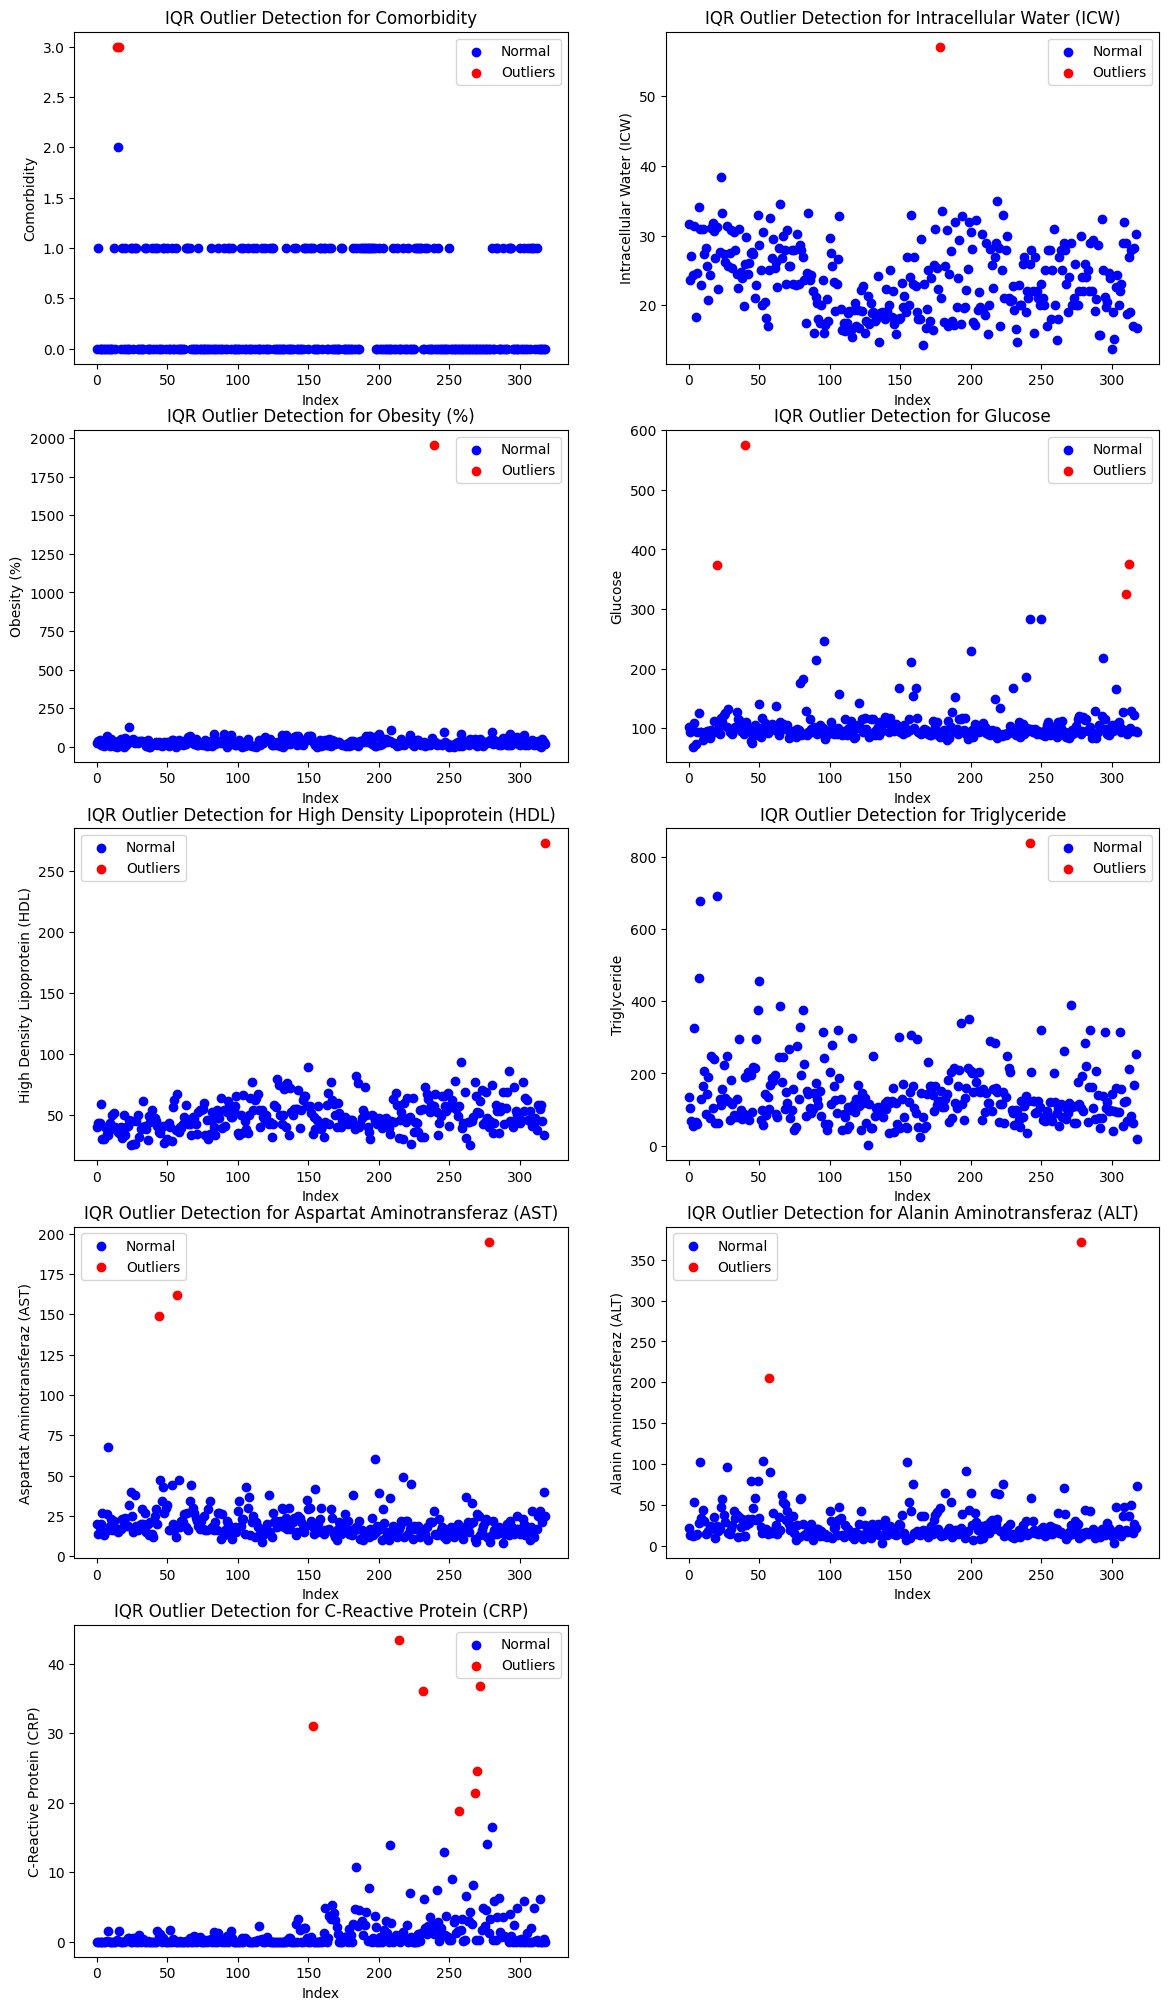

In [149]:
# Plot outliers using IQR method
def plot_iqr_outliers(df, outlier_column_names):
    # Determine number of columns to plot
    n = len(outlier_column_names)
    rows = (n + 1) // 2  # Arrange plots in 2 columns per row

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))
    axes = axes.flatten()  

    # Loop through each column identified as having outliers
    for i, col in enumerate(outlier_column_names):
        # Calculate adjusted quantiles (5th and 95th percentiles)
        Q1, Q3 = df[col].quantile([0.05, 0.95])
        IQR = Q3 - Q1

        # Compute lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Create masks for outliers and non-outliers
        outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        nonoutliers_mask = ~outliers_mask

        # Scatter plot: normal points in blue, outliers in red
        axes[i].scatter(df.index[nonoutliers_mask], df.loc[nonoutliers_mask, col], color="blue", label="Normal")
        axes[i].scatter(df.index[outliers_mask], df.loc[outliers_mask, col], color="red", label="Outliers")

        # Add title and axis labels
        axes[i].set_title(f"IQR Outlier Detection for {col}")
        axes[i].set_xlabel("Index")
        axes[i].set_ylabel(col)
        axes[i].legend()

    # Remove unused subplot spaces if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()


# Prepare list of columns with outliers and call the function
outlier_column_names = [df_checkoutliers.columns[i] for i in outlier_column_indexes]
plot_iqr_outliers(df, outlier_column_names)

# Check correlation between 'Gallstone Status' and the other columns. 
Should we drop columns that correlate little with Gallstone Status?

In [130]:
# Compute absolute correlation values for all columns
correlations = filtereddf.corr().iloc[0].abs()

# Sort correlations in descending order and print
print("Correlation between Gallstone Status and other columns:\n", correlations.sort_values(ascending=False))


Correlation between Gallstone Status and other columns:
 Gallstone Status                                  1.000000
C-Reactive Protein (CRP)                          0.425239
Vitamin D                                         0.351900
Aspartat Aminotransferaz (AST)                    0.240674
Lean Mass (LM) (%)                                0.220714
Total Body Fat Ratio (TBFR) (%)                   0.220166
Hemoglobin (HGB)                                  0.217976
Bone Mass (BM)                                    0.209753
Total Fat Content (TFC)                           0.170878
Hyperlipidemia                                    0.170874
High Density Lipoprotein (HDL)                    0.166791
Extracellular Fluid/Total Body Water (ECF/TBW)    0.160998
Extracellular Water (ECW)                         0.159888
Creatinine                                        0.152132
Gender                                            0.143778
Visceral Fat Area (VFA)                           0.143706

# Dataset splitting and modeling

In [131]:
# Assign filtered DataFrame to a new variable for clarity
tdataset = filtereddf

# Randomly sample 30% of the rows for the test set
test = tdataset.sample(frac=0.3)

# Select all rows that are not in the test set for the training set
train = tdataset[~tdataset.isin(test).all(1)]


In [132]:
# Train the model
model = LogisticRegression(max_iter=10000)
# First we test the training scores
_ = model.fit(train.loc[:, train.columns != 'Gallstone Status'], train['Gallstone Status'])

In [133]:
# Evaluate training error by generating predictions for the training set

# Create an empty DataFrame to store predictions
predictions = pd.DataFrame([])

# Predict 'Gallstone Status' for the training set using the trained model
# model.predict() returns predicted values; np.ceil() rounds them up to the nearest integer
predictions['Gallstone Status'] = np.ceil(model.predict(train.loc[:, train.columns != 'Gallstone Status']))

# Convert predictions to integers (ensures consistent data type)
predictions['Gallstone Status'] = predictions['Gallstone Status'].map(lambda x: int(x))

# Add the original row index from the training set for reference
predictions['Index'] = train.index.values

# Set 'Index' as the DataFrame index for easier alignment with original data
predictions.set_index('Index', inplace=True)

# Display a random sample of 5 predictions for quick inspection
predictions.sample(5)

,Gallstone Status
Index,
248,1
237,1
102,0
279,1
69,0


In [ ]:
# Compare predicted values with actual values and calculate accuracy

# Create a Boolean Series where True indicates a correct prediction
compare = train['Gallstone Status'] == predictions['Gallstone Status']

# Calculate accuracy:
print("accuracy:", compare.sum() / len(compare) * 100)

accuracy: 87.08133971291866


In [135]:
# Create a numerical preprocessing pipeline 
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
                    ])

In [136]:
# Get the list of numerical attribute column names from the training dataset
num_attribs = train.columns[1:].tolist()

# Create a preprocessing pipeline that applies 'num_pipeline' to the numerical attributes
preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
])

In [137]:
# Apply the preprocessing pipeline to the training data's numerical attributes.
# This transforms the raw numerical data using the steps defined in 'num_pipeline'
X_train = preprocess_pipeline.fit_transform(train[num_attribs])

# Extract the target variable from the training dataset.
y_train = train["Gallstone Status"]


In [138]:

# Initialize the Random Forest classifier with:
forest_clf = RandomForestClassifier(n_estimators=300, random_state=42)

# Train (fit) the classifier using the preprocessed training features (X_train)and the corresponding target labels (y_train)
forest_clf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [139]:
# Apply the same preprocessing pipeline to the test data's numerical attributes.
X_test = preprocess_pipeline.transform(test[num_attribs])

# Use the trained Random Forest model to make predictions on the preprocessed test data.
y_pred = forest_clf.predict(X_test)


In [161]:
# Perform 10-fold cross-validation on the Random Forest classifier.
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)

# Calculate and return the average accuracy score across all 10 folds.
print("Average accuracy score for Random Forest: {:.2f}%".format(forest_scores.mean() * 100))

Average accuracy score for Random Forest: 75.55%


In [162]:
# Initialize a Support Vector Machine (SVM) classifier.
svm_clf = SVC(gamma="auto")

# Perform 10-fold cross-validation on the SVM classifier.
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)

# Calculate and return the average accuracy score across all 10 folds.
print("Average accuracy score for Random Forest: {:.2f}%".format(svm_scores.mean() * 100))

Average accuracy score for Random Forest: 75.05%


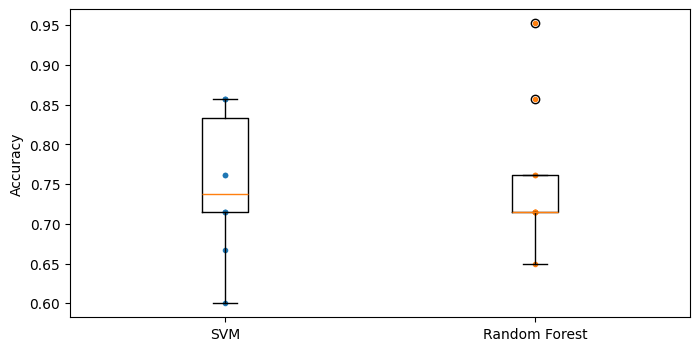

In [158]:
plt.figure(figsize=(8, 4))  

# Plot individual accuracy scores for each model as dots
plt.plot([1]*10, svm_scores, ".", label="SVM Scores")
plt.plot([2]*10, forest_scores, ".", label="Random Forest Scores")

# Create a boxplot to show the distribution of scores for each model
plt.boxplot([svm_scores, forest_scores], tick_labels=("SVM", "Random Forest"))

plt.ylabel("Accuracy")
plt.show()